In [14]:
def lagrange_interpolation(x_points, y_points, x):
    """
    Perform Lagrange interpolation for the given data points (x_points, y_points) and find the value at x.

    Parameters:
    x_points (list): x-coordinates of the data points
    y_points (list): y-coordinates of the data points
    x (float): the point at which interpolation is to be done

    Returns:
    float: Interpolated value at x
    """
    n = len(x_points)
    interpolated_value = 0.0

    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                term = term * (x - x_points[j]) / (x_points[i] - x_points[j])
        interpolated_value += term

    return interpolated_value

# Example usage
x_points = [1, 1.5, 2.0]
y_points = [0.0, 0.4055, 0.6931]
x = 1.2

print(f"Interpolated value at x = {x}: {lagrange_interpolation(x_points, y_points, x)}")


Interpolated value at x = 1.2: 0.17634799999999998


In [15]:
def divided_diff(x_points, y_points):
   
    n = len(x_points)
    coef = [y for y in y_points]  # Copy y_points to coef

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j])

    return coef

def newton_interpolation(x_points, y_points, x):
    
    coef = divided_diff(x_points, y_points)
    n = len(coef)
    interpolated_value = coef[-1]

    for i in range(n-2, -1, -1):
        interpolated_value = interpolated_value * (x - x_points[i]) + coef[i]

    return interpolated_value

# Example usage
x_points = [1, 1.5, 2.0]
y_points = [0.0, 0.4055, 0.6931]
x = 1.2

print(f"Interpolated value at x = {x}: {newton_interpolation(x_points, y_points, x)}")


Interpolated value at x = 1.2: 0.17634799999999998


In [20]:
import numpy as np
import matplotlib.pyplot as plt


def cheybe(x,n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        Tn_2 = 1
        Tn_1 = x
        for i in range(2, n + 1):
            Tn = 2*x*Tn_1 - Tn_2
            Tn_2 = Tn_1
            Tn_1 = Tn
        return Tn

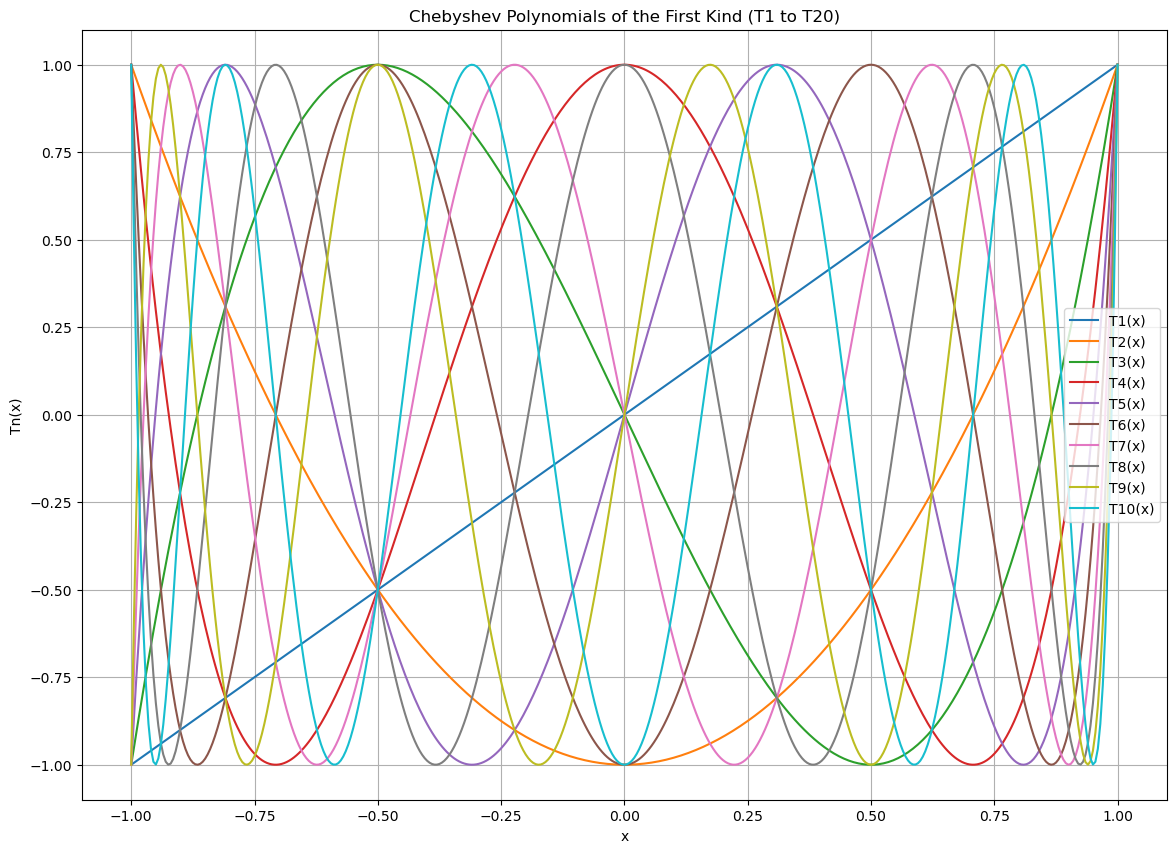

In [31]:
# Generate x values
x = np.linspace(-1,1,50)
x_ = [i/200 for i in range(-200,201)]
plt.figure(figsize=(14,10))
for n in range(1,11):
    y = [cheybe(xi, n) for xi in x_]
    plt.plot(x_,y,label = f"T{n}(x)")
    
plt.title('Chebyshev Polynomials of the First Kind (T1 to T20)')
plt.xlabel('x')
plt.ylabel('Tn(x)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
x_

[-1, 0]

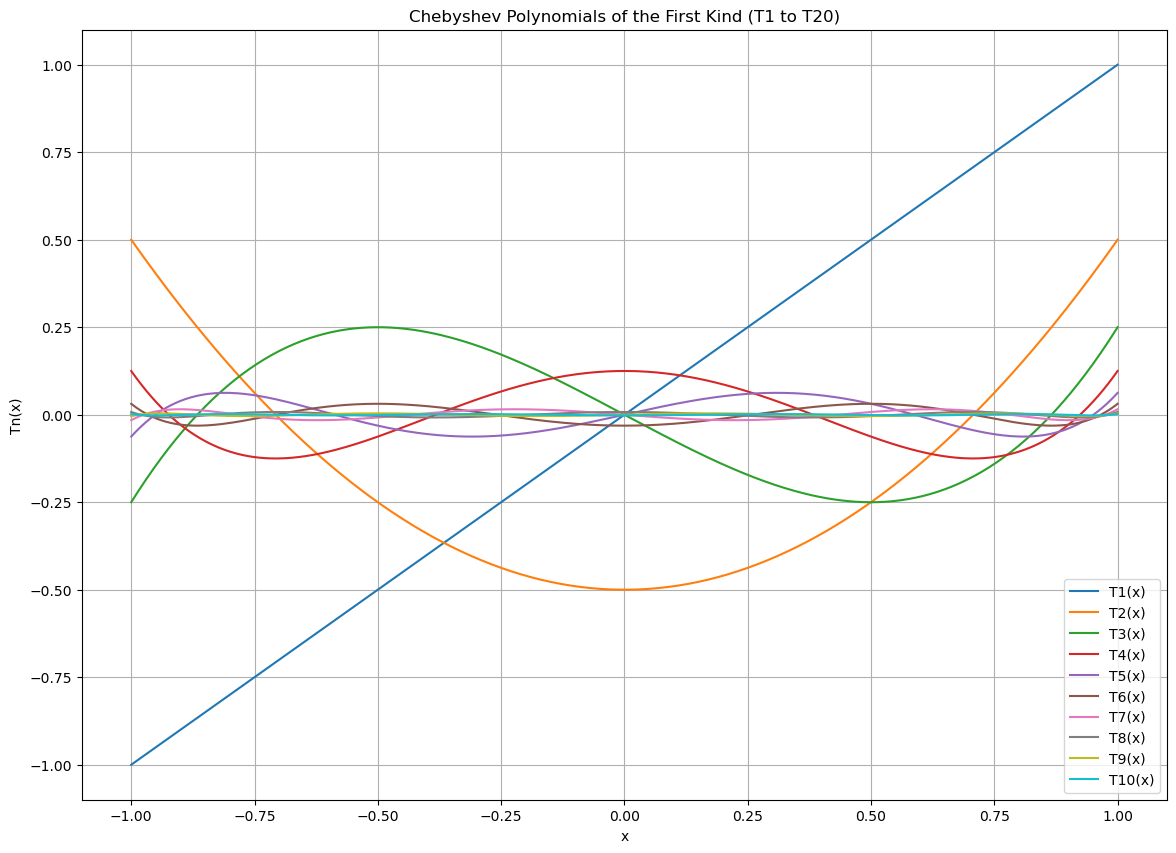

In [34]:
def monic_chey(x,n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        Tn_2 = 1
        Tn_1 = x
        for i in range(2,n+1):
            Tn = 2*x*Tn_1 - Tn_2
            Tn_2 = Tn_1
            Tn_1 = Tn
        return Tn/(2**(n-1))
    
x = np.linspace(-1,1,50)
x_ = [i/200 for i in range(-200,201)]
plt.figure(figsize=(14,10))
for n in range(1,11):
    y = [monic_chey(xi, n) for xi in x_]
    plt.plot(x_,y,label = f"T{n}(x)")
    
plt.title('Chebyshev Polynomials of the First Kind (T1 to T20)')
plt.xlabel('x')
plt.ylabel('Tn(x)')
plt.legend()
plt.grid(True)
plt.show()